In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Stability and activity

In [2]:
import pandas as pd


df_data = pd.read_excel('data/round3/wet-lab/R3_wetlab_data.xlsx', sheet_name='act_stab')
# rename 'UNO' to 'Uno 100L' for consistency
df_data['Variant'] = df_data['Variant'].replace({'UNO': 'Uno 100L'})
df_data['After_activity'] = df_data['Activity'] * df_data['Stability'] / 100  # Calculate activity after thermo incubation
df_data.head()

,Variant,Activity,Stability,After_activity
0,Y511395,25787.0,32,8251.84
1,Y511395,26485.0,27,7150.95
2,Y511395,26321.0,25,6580.25
3,Y5511412,27081.0,34,9207.54
4,Y5511412,27193.0,36,9789.48


In [3]:
df_data_grouped = df_data.groupby('Variant').agg(
    Activity=('Activity', 'mean'),
    Activity_std=('Activity', 'std'),
    Stability=('Stability', 'mean'),
    Stability_std=('Stability', 'std'),
    After_activity=('After_activity', 'mean'),
    After_activity_std=('After_activity', 'std')
).reset_index()

df_data = df_data_grouped.sort_values(by='Activity', ascending=False)
df_data['act'] = df_data['Activity'] / 1000  # Convert to U/mg for plotting
df_data['act_std'] = df_data['Activity_std'] / 1000  # Convert to U/mg for plotting

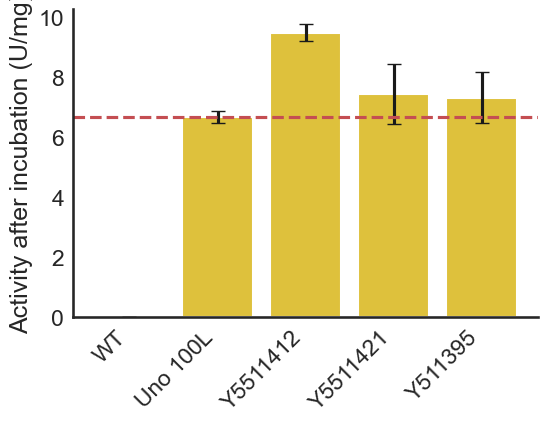

In [4]:
# Draw activity plot

from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

df_data['after_act'] = df_data['After_activity'] / 1000  # Convert to U/mg for plotting
df_data['after_act_std'] = df_data['After_activity_std'] / 1000  # Convert to U/mg for plotting

ax.bar(df_data['Variant'], df_data['after_act'], yerr=df_data['after_act_std'], capsize=5, color= '#DEC13C')
ax.set_ylabel('Activity after incubation (U/mg)')

# draw a horizontal line at UNO 100L
uno_value = df_data[df_data['Variant'] == 'Uno 100L']['after_act'].values[0]
ax.axhline(y=uno_value, color='r', linestyle='--', label='UNO 100L')
ax.set_xticks(df_data['Variant'])
ax.set_xticklabels(df_data['Variant'], rotation=45, ha='right')

plot_style_utils.save_for_pub(fig, 'figures/round3/R3_act_after_stab_plot')

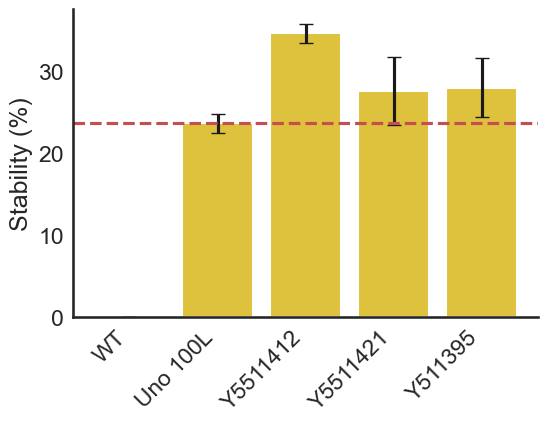

In [5]:
# Draw activity plot

from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ax.bar(df_data['Variant'], df_data['Stability'], yerr=df_data['Stability_std'], capsize=5, color = '#DEC13C')
ax.set_ylabel('Stability (%)')

# draw a horizontal line at UNO 100L
uno_value = df_data[df_data['Variant'] == 'Uno 100L']['Stability'].values[0]
ax.axhline(y=uno_value, color='r', linestyle='--', label='UNO 100L')
ax.set_xticks(df_data['Variant'])
ax.set_xticklabels(df_data['Variant'], rotation=45, ha='right')

plot_style_utils.save_for_pub(fig, 'figures/round3/R3_stab_plot')

# Washing effects

In [6]:
import pandas as pd


df_wash = pd.read_excel('data/round3/wet-lab/R3_wetlab_data.xlsx', sheet_name='wash')
df_wash.head()

,Variant,Before,After,Diff
0,Empty,22.84,27.51,4.67
1,Uno 100L,22.67,32.74,10.07
2,Y511395,22.79,35.79,13.00
3,Y5511412,22.83,35.54,12.71
4,Y5511421,22.74,36.17,13.43


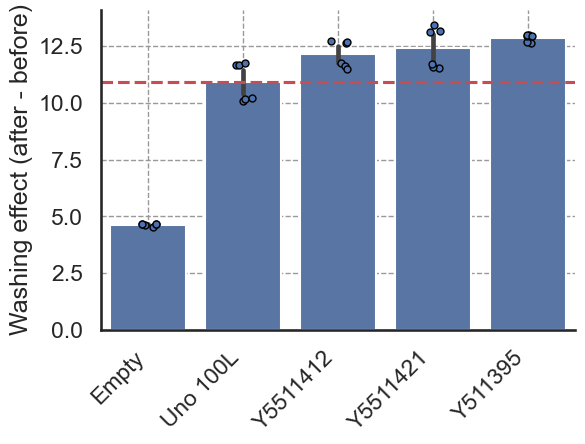

In [7]:
import seaborn as sns
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")

order = ['Empty', 'Uno 100L', 'Y5511412', 'Y5511421', 'Y511395']
# reorder the dataframe based on the order list
df_wash['Variant_catg'] = pd.Categorical(df_wash['Variant'], categories=order, ordered=True)
df_wash = df_wash.sort_values('Variant_catg')

g = sns.catplot(data=df_wash, kind="bar", x="Variant", y="Diff", hue=None, # errorbar="sd",
                height=6, legend_out=False,)

sns.stripplot(data=df_wash, x="Variant", y="Diff", hue=None, dodge=True, ax=g.ax, edgecolor='black', linewidth=1, legend=False,)
# draw horizontal line at Uno 100L
uno_value = df_wash[df_wash['Variant'] == 'Uno 100L']['Diff'].mean()
g.ax.axhline(y=uno_value, color='r', linestyle='--', label='Uno 100L')

g.set_axis_labels("", "Washing effect (after - before)")
g._legend.remove()  # Remove legend if present
# remove x label
g.ax.set_xlabel('')
g.fig.set_size_inches(6, 4)
# set x labels to 45 degree
g.ax.set_xticks(order)
g.set_xticklabels(order, rotation=45, ha='right')

g.ax.grid(True, color='0.6', linestyle='--', linewidth=1)
plot_style_utils.save_for_pub(fig=g, path="figures/round3/R3_wash_bar_jitterplot")